## Facebook User Data Analysis


### The data framework analyse the facebook user's .From the given data set studies the pattern hidden in data set for the users.The behaviuor of each Facebook user depends on related with the each data's in the column.Here are checking the dependant and independant variables related with the main data. 


#### Intializing and importing the libraries for the EDA process

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Calling the data sets and defing the data set into a variable


#### Exploratory data anlysis over the data

In [2]:
df = pd.read_csv('facebookdata.csv')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(99003, 15)

#### Checking the null values of the given data

In [4]:
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

#### From Checking null values we had found that the gender column having 175 null values and the tenure column having 2 null values.

In [5]:
df.gender[df.gender == 'male'] = 1
df.gender[df.gender == 'female'] = 0
df.head()



,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,1,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,0,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,1,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,0,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,1,82.0,0,0,0,0,0,0,0,0



#### converting the gender characters into integers for the data evaluation.
#### The male character has given the integer value '1' and the female character has given the value '0' ,for the ease of analysis 

<AxesSubplot:xlabel='gender'>

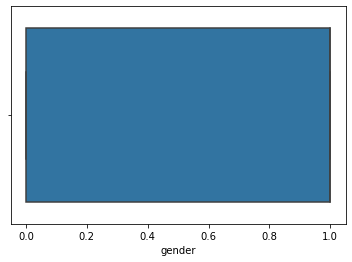

In [6]:
plt.figure(figsize=(6,4))
plt.show

sns.boxplot(df.gender)


<AxesSubplot:xlabel='gender', ylabel='Density'>

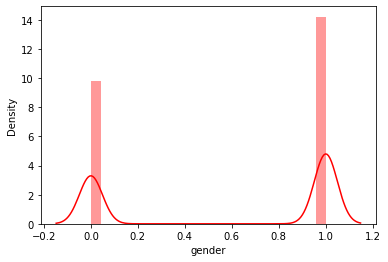

In [7]:
sns.distplot(df.gender,color='red')

#### From the distplot we can have the assemption that gender male is using facebook Commonly so we are in th conclusion that filling mode value's in the null postion

### Replacing Null Values with mode value 

In [8]:
df['gender'].fillna(df['gender'].mode()[0],inplace = True)

In [9]:
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

<AxesSubplot:xlabel='tenure'>

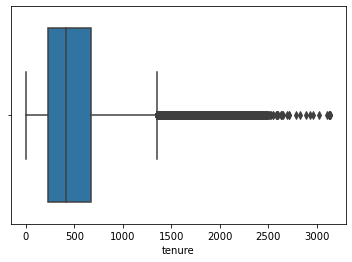

In [10]:
plt.figure(figsize=(6,4))
plt.show
sns.boxplot(df.tenure)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

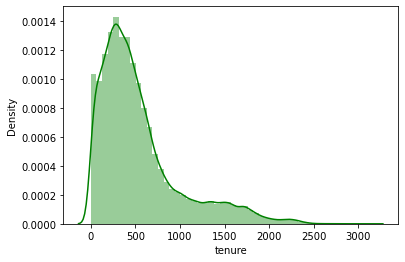

In [11]:
sns.distplot(df.tenure,color='green')

### From the boxplot its been clear that majority of tenure is the range of 0-1000 so we can't use mode or medain here to fill the null values.The null value in the tenure is filled with the median.

### Filling the null value in tenure with median

In [12]:
df['tenure'].fillna(df['tenure'].mean(),inplace = True)

In [13]:
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

### Checking the co-relation with the each and every column 

In [14]:
df.corr()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,1.000000,-0.007265,-0.000839,0.007265,0.002924,-0.001670,-0.003446,-0.001314,-0.001591,-0.002875,0.001526,-0.004868,0.001753,0.001828,0.001074
age,-0.007265,1.000000,0.035035,-1.000000,0.025167,-0.079871,0.462710,-0.027407,-0.058059,-0.013009,-0.022570,-0.026715,-0.024248,0.015585,-0.018224
dob_day,-0.000839,0.035035,1.000000,-0.035035,0.129443,-0.046573,0.041854,0.021961,0.022999,0.015980,0.001367,0.014541,0.000497,0.009353,0.002460
dob_year,0.007265,-1.000000,-0.035035,1.000000,-0.025167,0.079871,-0.462710,0.027407,0.058059,0.013009,0.022570,0.026715,0.024248,-0.015585,0.018224
dob_month,0.002924,0.025167,0.129443,-0.025167,1.000000,-0.035756,0.029445,0.019804,0.020075,0.014147,0.006495,0.010400,0.006435,0.012136,0.006003
gender,-0.001670,-0.079871,-0.046573,0.079871,-0.035756,1.000000,-0.089242,-0.097499,-0.028266,-0.150389,-0.064857,-0.124181,-0.062071,-0.107763,-0.062990
tenure,-0.003446,0.462710,0.041854,-0.462710,0.029445,-0.089242,1.000000,0.166256,0.133505,0.057132,0.027745,0.028052,0.023971,0.070757,0.030553
friend_count,-0.001314,-0.027407,0.021961,0.027407,0.019804,-0.097499,0.166256,1.000000,0.825850,0.298017,0.236463,0.235656,0.232701,0.229803,0.220727
friendships_initiated,-0.001591,-0.058059,0.022999,0.058059,0.020075,-0.028266,0.133505,0.825850,1.000000,0.285592,0.175131,0.229808,0.173804,0.214022,0.161439
likes,-0.002875,-0.013009,0.015980,0.013009,0.014147,-0.150389,0.057132,0.298017,0.285592,1.000000,0.327376,0.871652,0.329258,0.644960,0.295687


### Plotiing the heatmap showing the co-realtionship of each column values

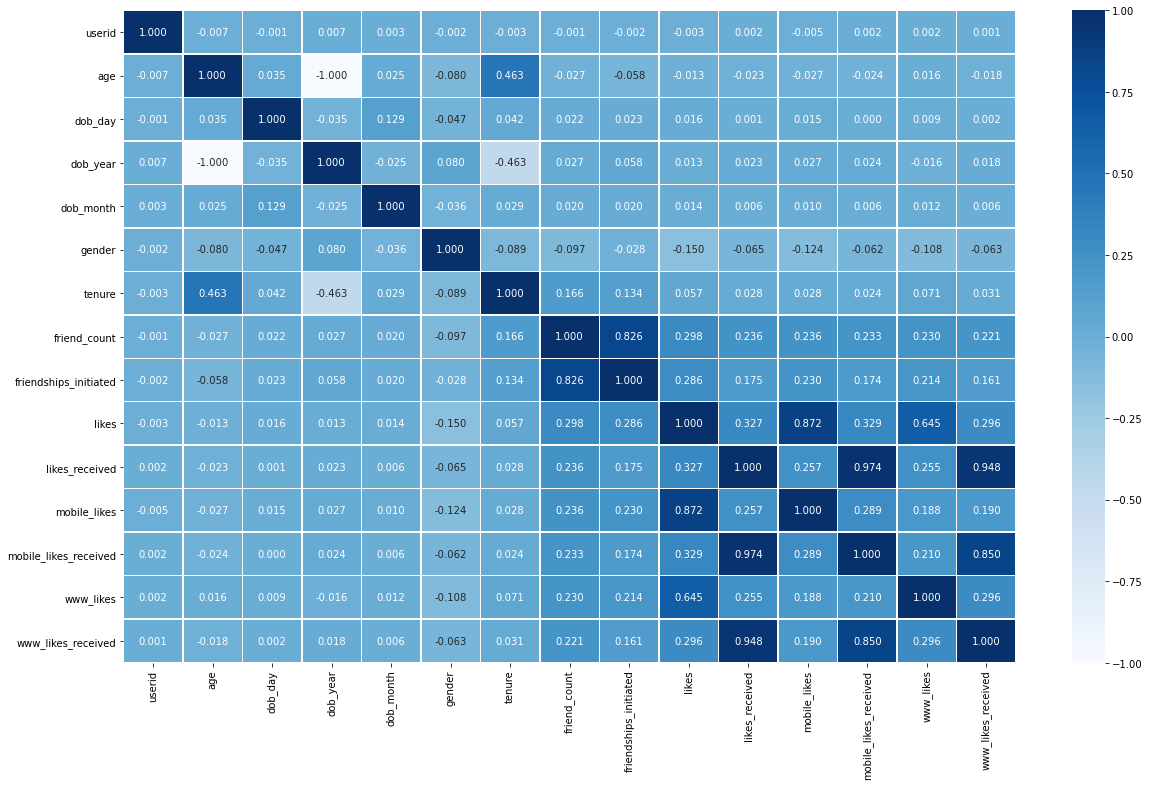

In [15]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(df.corr(),annot = True, fmt = ".3f",linewidth=.5,cmap = "Blues")

#### From the heatmap represntation we can say that co-realtion showing dark color are in strong relationship and the box with showing

### Pie Chart

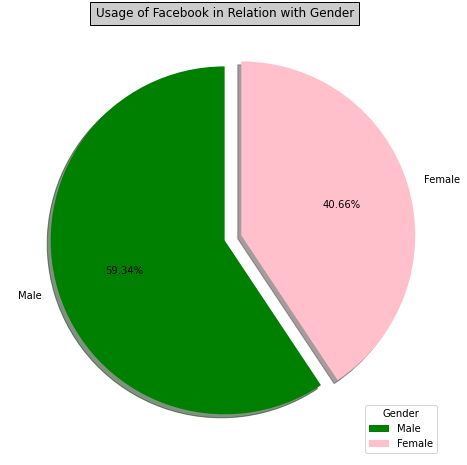

In [16]:
plt.figure(figsize=(23,8))
labels = ["Male","Female"]
values = df['gender'].value_counts().tolist()
mycolors = ["Green","Pink"]
dia1 = plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.1],colors= mycolors,startangle = 90)
plt.title("Usage of Facebook in Relation with Gender" ,bbox={'facecolor':'0.8', 'pad':5})
plt.legend(title= "Gender")
plt.show(dia1)

### From the above pie chart its been showing that the majority user of Facebook is Male with an percentage of 59.34% ,the same about 40.66% of total users are females.

   gender  friend_count
0       0       9740258
1       1       9699059


Text(0.5, 1.0, 'Grouping the gender on total number of friends')

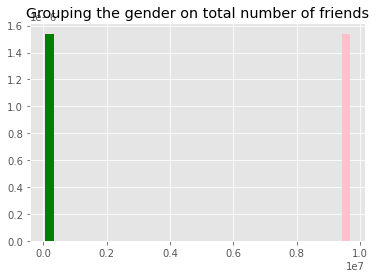

In [17]:
colors = ["green","pink"]
labels = ["Male","Female"]
df_count = df.groupby(["gender"]).friend_count.sum().reset_index()
print(df_count)
plt.style.use('ggplot')
plt.hist(df_count,color= colors,label=labels,bins=15,density = True)
plt.title('Grouping the gender on total number of friends' )

### From counting we had found that there is only slight variation in the total amount of friends based on gender

In [18]:
df_intiated = df.groupby(["gender"]).friendships_initiated.sum().reset_index()
print(df_intiated)

   gender  friendships_initiated
0       0                4584894
1       1                6053223


### From the count more  friend requests are intiated by the gender Male and Female are not more interested with intiating friends addition

In [19]:
df_intiated = df.groupby(["gender"]).tenure.sum().reset_index()
print(df_intiated)

   gender        tenure
0       0  2.363823e+07
1       1  2.961424e+07


### From the count it showing tenure is more in Males than females

## Checking least active users in Facebook

In [20]:
zero_friend = df[['friend_count']].eq(0).sum()
zero_friend

friend_count    1962
dtype: int64

In [21]:
likes_recv = df[['likes_received']].eq(0).sum()
likes_recv

likes_received    24428
dtype: int64

In [22]:
likes = df[['likes']].eq(0).sum()
likes

likes    22308
dtype: int64

### By Analysing the friend count we comes to a conclusion that almost 1962 users in the facebook doesnt have friends at all

###  Analysing the amount likes recieved by users in facebook around 24428 persons in the facebook doesnt have a minm of 1 likes 
### An amount of 22308 users in the facebook even didnt like any of the posts

# Analysis of Mobile Devices vs Web Devices

## Analysis of Gender vs Mobile likes

In [33]:
gender_mobilike = df.groupby('gender',as_index = False)['mobile_likes'].mean()
gender_mobilike
sample = pd.DataFrame(gender_mobilike)
sample


,gender,mobile_likes
0,0,172.912928
1,1,60.348176


### From the analysis we had found that an average of 172.91 famales getting the likes through mobile phone device,in same way we can say that almost an average of 60.34 males are getting like through mobile phones.

<AxesSubplot:xlabel='gender', ylabel='Count'>

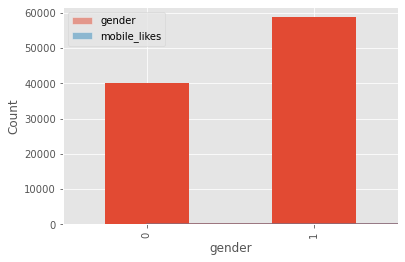

In [41]:
sample = df.groupby('gender')
sample.size().plot(kind='bar')
sns.histplot(data=gender_mobilike,label = "Gender",kde = True)

In [26]:
gender_weblike = df.groupby('gender',as_index = False)['www_likes'].mean()
gender_weblike


,gender,www_likes
0,0,87.138297
1,1,24.490034


### From the analysis we get the conclusion that gender females get maximum like of an average of 87.13 and the gender male gets only an average of 24.49 likes through web facebook

In [27]:
gender_mobilikerecv = df.groupby('gender',as_index = False)['mobile_likes_received'].mean()
gender_mobilikerecv

,gender,mobile_likes_received
0,0,147.100884
1,1,40.967199


### The analysis of the like recieved through mobile and web portal are showing.The like recieved through mobiles based on Gender showing females are having an Avg of 147.10 which is almost 4 times compared to the gender male having an Avg of 40.96

In [28]:
gender_weblikerecv = df.groupby('gender',as_index = False)['www_likes_received'].mean()
gender_weblikerecv


,gender,www_likes_received
0,0,104.334451
1,1,27.210863


### Compared to mobile like recieved through mobile .The Avg of like recieved through web portal is low ,having gender female of 104.33 and males having an Avg of 27.21